# Week 3: Clustering

**Darren Lim**

In this workshop, we will work through a set of problems on clustering, another cannonical form of unsupervised learning. Clustering is an important tool that is used to discover homogeneous groups of data points within a heterogeneous population. It can be the main goal in some problems, while in others it may be used in EDA to understand the main types of behavior in the data or in feature engineering.   

We will start by generating some artificial data, and then we will utilize clustering algorithms described in lectures and explore the impact of feature engineering on the solution. We will then attempt to find clusters in a gene expression dataset. 

As usual, the worksheets will be completed in teams of 2-3, using **pair programming**, and we have provided cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, **you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday** of the week the workshop was given. 

As you work through the problems it will help to refer to your lecture notes (navigator). The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 

## Outline

1. [Problem Definition and Setup: Simulated Example](#setup1)
2. [K-means: Simulated Example](#kmeans1)
3. [Hierarchical Clustering: Simulated Example](#hc)
4. [Gene Expression Data](#genedata)
5. [Hierarchical Clustering: Gene Expression Data](#hc_genedata)
6. [K-means Clustering: Gene Expression Data](#kmeans_genedata)

# Problem Definition and Setup: Simulated Example <a id='setup1'></a>

## Packages

First, lets load in some packages to get us started. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

## Data: Simulated Example

We will begin with a simple simulated example in which there are truly three clusters. We assume that there are $D=2$ features and within each cluster, the data points are generated from a spherical normal distribution $N(\mathbf{m}_k, \sigma^2_k \mathbf{I})$ for clusters $k=1,2,3$, where both the mean $\mathbf{m}_k$ and variance $\sigma^2_k$ are different across clusters. Specifically, we assume that: 

* Cluster 1: contains $|C_1|=500$ points with mean vector $\mathbf{m}_1 = \begin{pmatrix} 0 \\ 4 \end{pmatrix}$ with standard deviation $\sigma_1 = 2$.
* Cluster 2: contains $|C_2|=250$ points with mean vector $\mathbf{m}_2 = \begin{pmatrix} 0 \\ -4 \end{pmatrix}$ with standard deviation $\sigma_2 = 1$.
* Cluster 3: contains $|C_3|=100$ points with mean vector $\mathbf{m}_3 = \begin{pmatrix} -4 \\ 0 \end{pmatrix}$ with standard deviation $\sigma_3 = 0.5$.

Run the following code to generate the dataset described above.

In [2]:
# Number of features
D = 2

# Cluster sizes
N_1 = 500
N_2 = 250
N_3 = 100

# Cluster means
m_1 = np.array([0., 4.])
m_2 = np.array([0., -4.])
m_3 = np.array([-4., 0.])

# Cluster standard deviations
sd_1 = 2.
sd_2 = 1.
sd_3 = 0.5

# Generate the data
rnd = np.random.RandomState(5)
X_1 = rnd.normal(loc = m_1, scale = sd_1, size = (N_1,D))
X_2 = rnd.normal(loc = m_2, scale = sd_2, size = (N_2,D))
X_3 = rnd.normal(loc = m_3, scale = sd_3, size = (N_3,D))
X = np.vstack((X_1, X_2, X_3))

# Save true cluster labels
cl = np.hstack((np.repeat(1,N_1),np.repeat(2,N_2),np.repeat(3,N_3)))

In [ ]:
# Check that the size is correct
display(X.shape)

(850, 2)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### 🚩 Exercise 1 (CORE)

Visualise the data and color by the true cluster labels.

<Axes: xlabel='x', ylabel='y'>

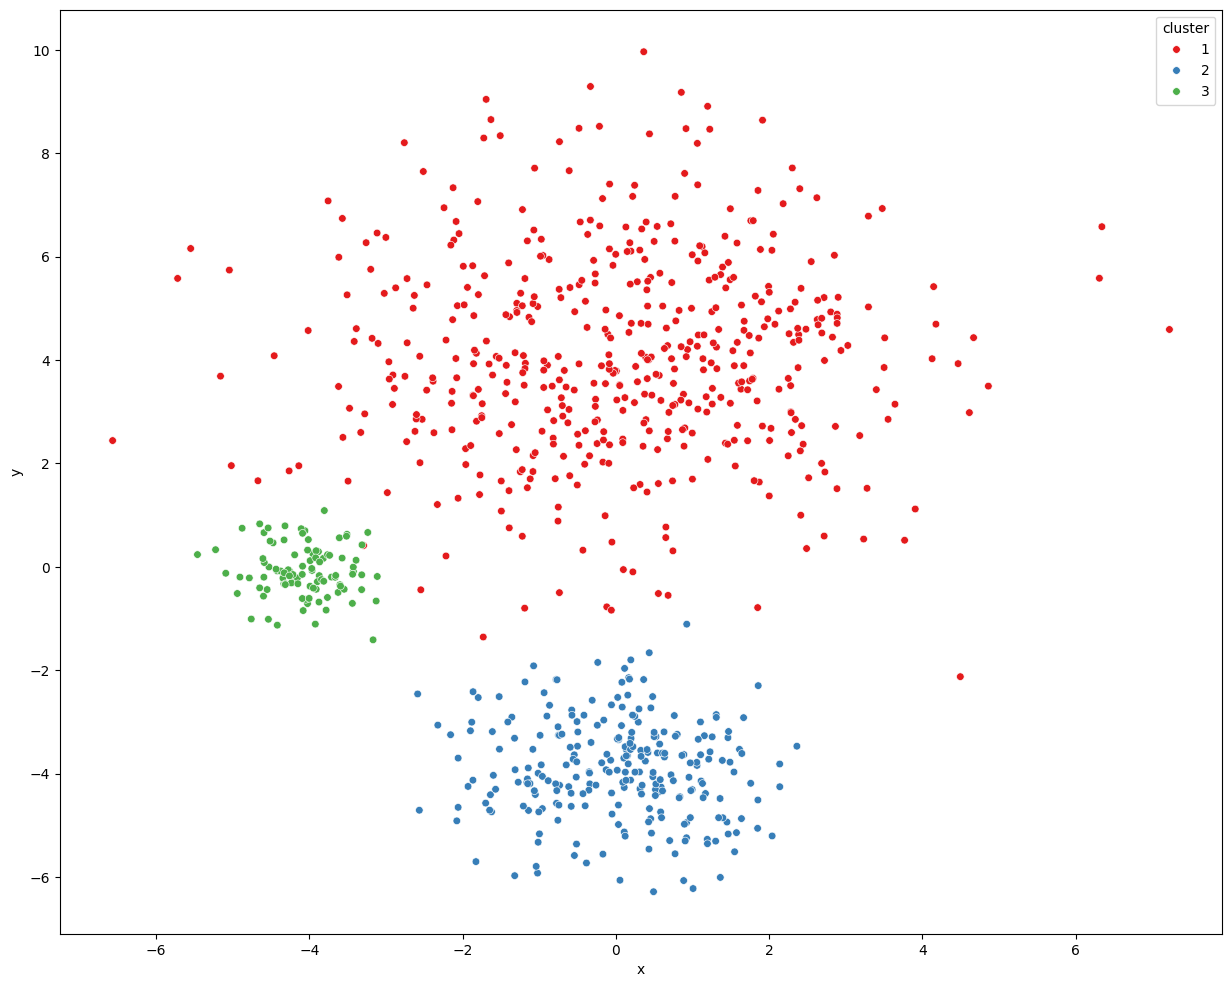

In [ ]:
df = pd.DataFrame(X, columns = ["x", "y"])
df["cluster"] = cl

plt.figure(figsize = (15, 12))
sns.scatterplot(
    data = df, 
    x = "x", 
    y = "y", 
    hue = "cluster", 
    palette = "Set1", 
    s = 30
)


# K-means Clustering: Simulated Example <a id='kmeans1'></a>

To perform K-means clustering, we will use `KMeans()` in `sklearn.cluster`. Documentation is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and for an overview of clustering methods available in `sklearn`, see [link](https://scikit-learn.org/stable/modules/clustering.html). There are different inputs we can specify when calling `KMeans()` such as:

- `n_clusters`: the number of clusters. 
- `init`: which specifies the intialization of the centroids, e.g. can be set to `k-means++` for K-means++ initialization or `random` for random initialization.
- `n_init`: which specifies the number of times the algorithm is run with different random initializations
- `random_state`: this can bet set to a fixed number to make results reproducible.

We can then use the `.fit()` method of `KMeans` to run the K-means algorithm on our data.

After fitting, some of the relevant attributes of interest include:

- `labels_`: cluster assignments of the data points.
- `cluster_centers_`: mean corresponding to each cluster, stored in a matrix of size: number of clusters $K$ times number features $D$.
- `inertia_`: the total within-cluster variation.

We can also call the methods `.transform()` and `.predict()` on our fitted `KMeans()` objects. The former transforms/encodes an $N \times D$ feature matrix into an $N \times C$ matrix, where the new features reprent the distance to cluster $c$, for $c=1,\ldots, C$. The later predicts the cluster labels of each sample in  an $N \times D$ feature matrix (i.e. returns the index of the closest cluster).

### 🚩 Exercise 2 (CORE)

Let's start by exploring how the clustering changes across the K-means iterations. To do, set:

- number of clusters to 3
- initialization to random
- number of times the algorithm is run to 1
- fix the random seed to a number of your choice (e.g. 0)


a) Now, fit the K-means algorithms with different values of the maximum number of iterations fixed to 1,2,3, and the default value of 300. 

b) Plot the data points colored by cluster for the four different cases and mark the cluster centers to observe how the clustering solution changes across iterations. 

c) How many iterations are needed for the convergence?
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- To find the number of iterations, check the attributes of [`KMeans`](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
    
</details>

In [ ]:
# Part a:
max_iters = [1, 2, 3, 300]
kmeans_models = {}

for mi in max_iters:
    kmeans = KMeans(
        n_clusters = 3,
        init = "random",
        n_init = 1,
        max_iter = mi,
        random_state = 0
    )
    kmeans.fit(X)
    kmeans_models[mi] = kmeans


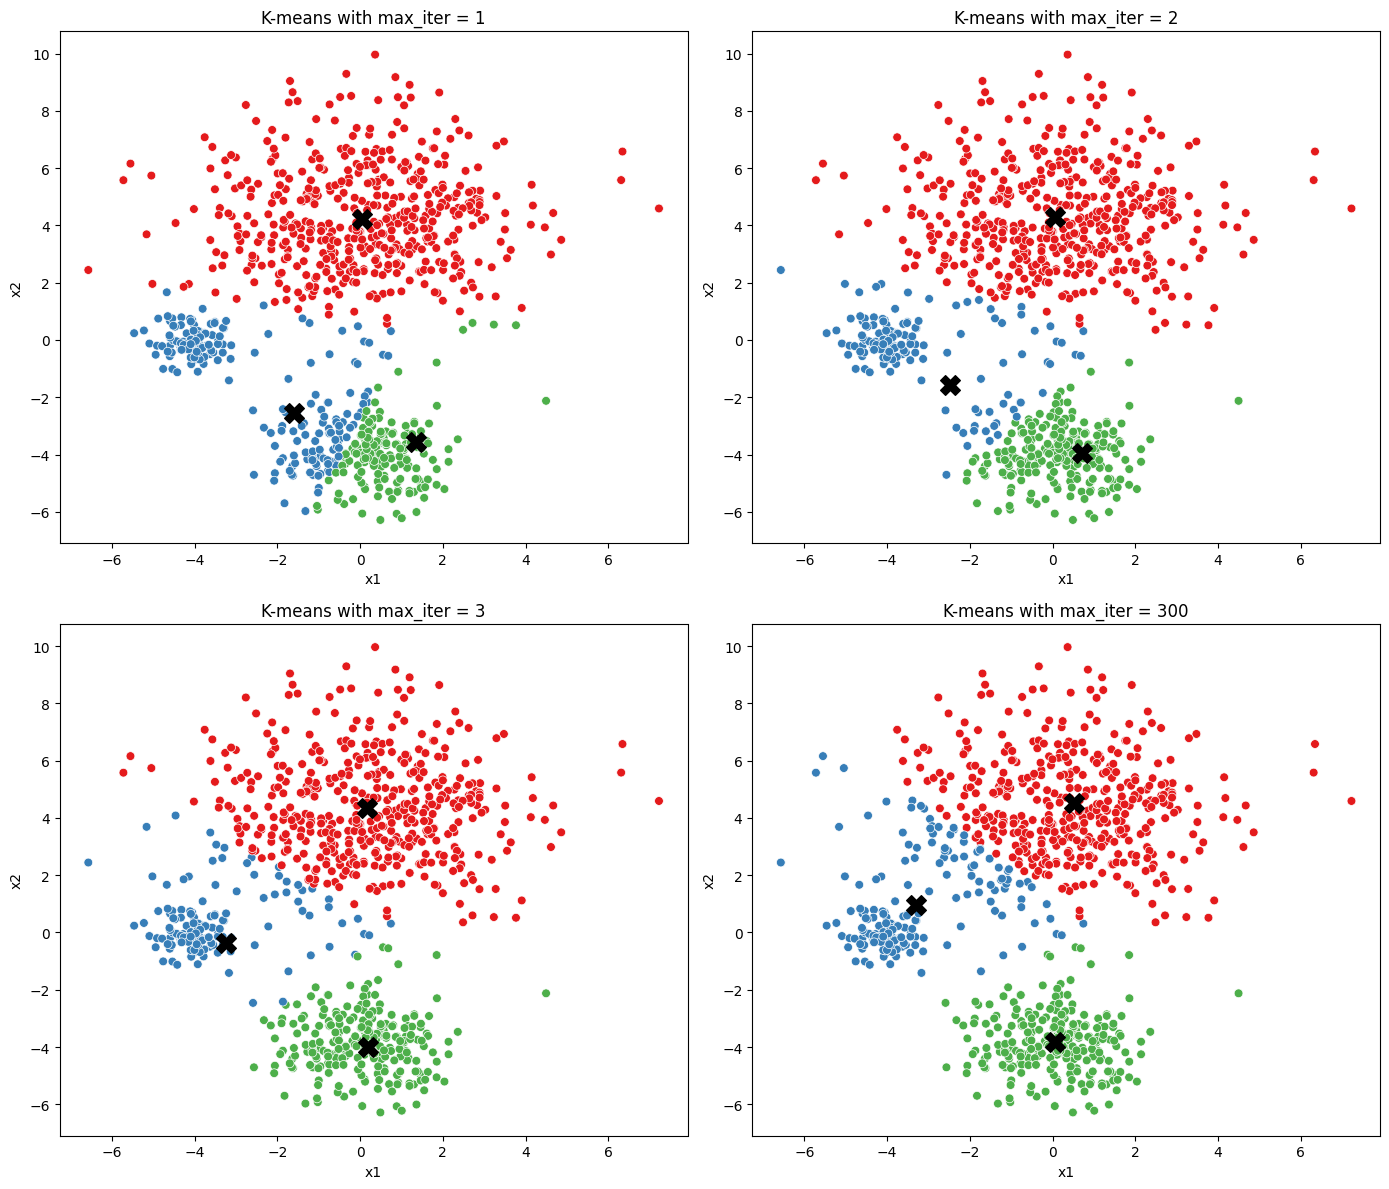

In [10]:
# Part b:
fig, axes = plt.subplots(2, 2, figsize = (14, 12))
axes = axes.ravel()

for ax, mi in zip(axes, max_iters):
    kmeans = kmeans_models[mi]
    
    # plot data coloured by cluster assignment
    sns.scatterplot(
        x = X[:, 0], 
        y = X[:, 1], 
        hue = kmeans.labels_, 
        palette = "Set1", 
        s = 40, 
        ax = ax, 
        legend = False
    )
    
    # plot cluster centres
    ax.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1], 
        c = "black", 
        s = 200, 
        marker = "X", 
        label = "Centroids"
    )
    
    ax.set_title(f"K-means with max_iter = {mi}")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

plt.tight_layout()
plt.show()


In [ ]:
# Part c:
display(kmeans_models[300].n_iter_)

11

.n_iter_ attribute tells the actual number of iterations to run before convergence.

K-means stops early once cluster assignments stop changing, even if max_iter is large.

- Centroids stop moving, or
- Labels stop changing

### 🚩 Exercise 3 (CORE)

Next, compare the random intialization with K-means++ (in this case fix the number of different initializations to 10). Plot both clustering solutions. Which requires fewer iterations? and which provides a lower within-cluster variation?

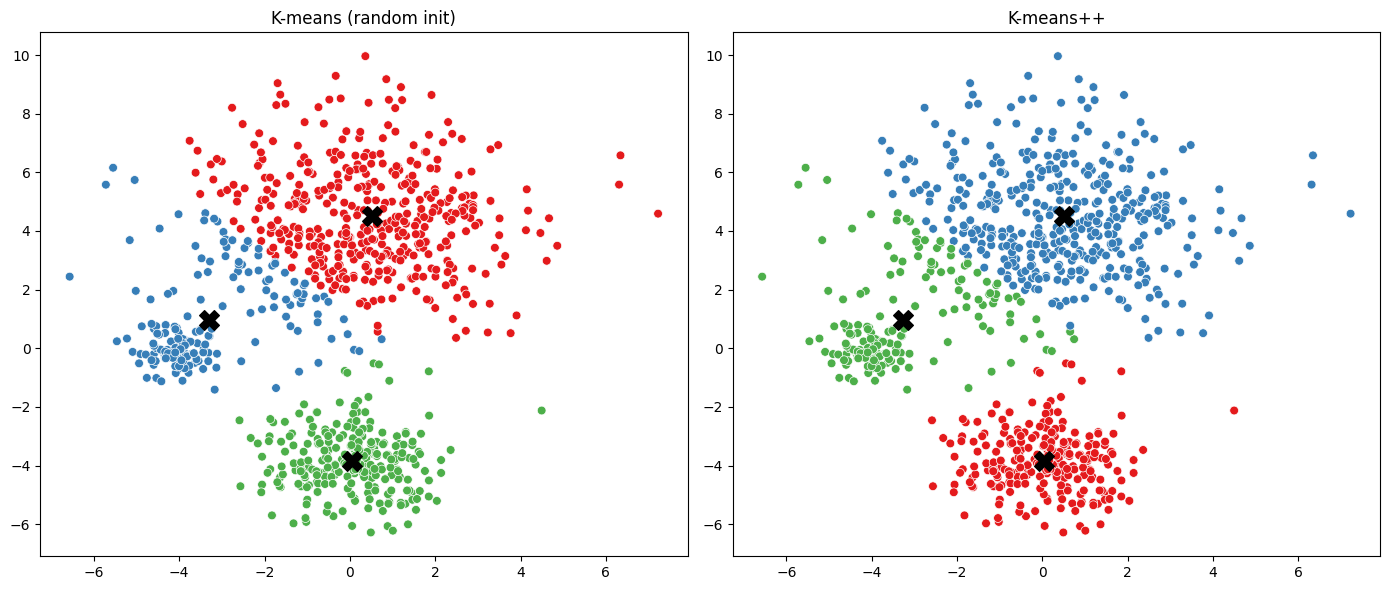

Random init:
  Iterations: 11
  Inertia: 3833.307616210694

K-means++:
  Iterations: 4
  Inertia: 3833.2826468841135


In [13]:
# Random initialization
kmeans_random = KMeans(
    n_clusters = 3, 
    init = "random", 
    n_init = 10, 
    random_state = 0
)
kmeans_random.fit(X)

# K-means++ initialization
kmeans_pp = KMeans(
    n_clusters = 3, 
    init = "k-means++", 
    n_init = 10, 
    random_state = 0
)
kmeans_pp.fit(X)

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

# Random init
sns.scatterplot(
    x = X[:, 0], 
    y = X[:, 1], 
    hue = kmeans_random.labels_, 
    palette = "Set1", 
    s = 40, 
    ax = axes[0], 
    legend = False
)
axes[0].scatter(
    kmeans_random.cluster_centers_[:, 0], 
    kmeans_random.cluster_centers_[:, 1], 
    c = "black", 
    s = 200, 
    marker = "X"
)
axes[0].set_title("K-means (random init)")

# K-means++
sns.scatterplot(
    x = X[:, 0], 
    y = X[:, 1], 
    hue = kmeans_pp.labels_, 
    palette = "Set1", 
    s = 40, 
    ax = axes[1], 
    legend = False
)
axes[1].scatter(
    kmeans_pp.cluster_centers_[:, 0], 
    kmeans_pp.cluster_centers_[:, 1], 
    c = "black", 
    s = 200, 
    marker = "X"
)
axes[1].set_title("K-means++")

plt.tight_layout()
plt.show()

print("Random init:")
print("  Iterations:", kmeans_random.n_iter_)
print("  Inertia:", kmeans_random.inertia_)

print("\nK-means++:")
print("  Iterations:", kmeans_pp.n_iter_)
print("  Inertia:", kmeans_pp.inertia_)

K-means++

- n_iter_ is typically smaller for K-means++. Reason: initial centroids are spread out intelligently, closer to the final solution.
- inertia_ is usually lower. With n_init = 10, both methods try multiple runs, but K-means++ starts from better initial positions -> better local minimum.

Compared to random initialisation, K-means++ converges in fewer iterations and typically achieves a lower within-cluster variation (inertia), due to a more informed and well-separated initialisation of cluster centroids.

### 🚩 Exercise 4 (CORE)

In the following two code cells, we compare the clustering solution using a different number of initializations equal to 1, 2, 5, 10, and 20 for kmeans++ initialization (first cell) and random initialization (second cell). 

Based on the results, comment on the preferred initialization strategy and how many intializations are needed? Try changing the random state; how does that change your conclusions?

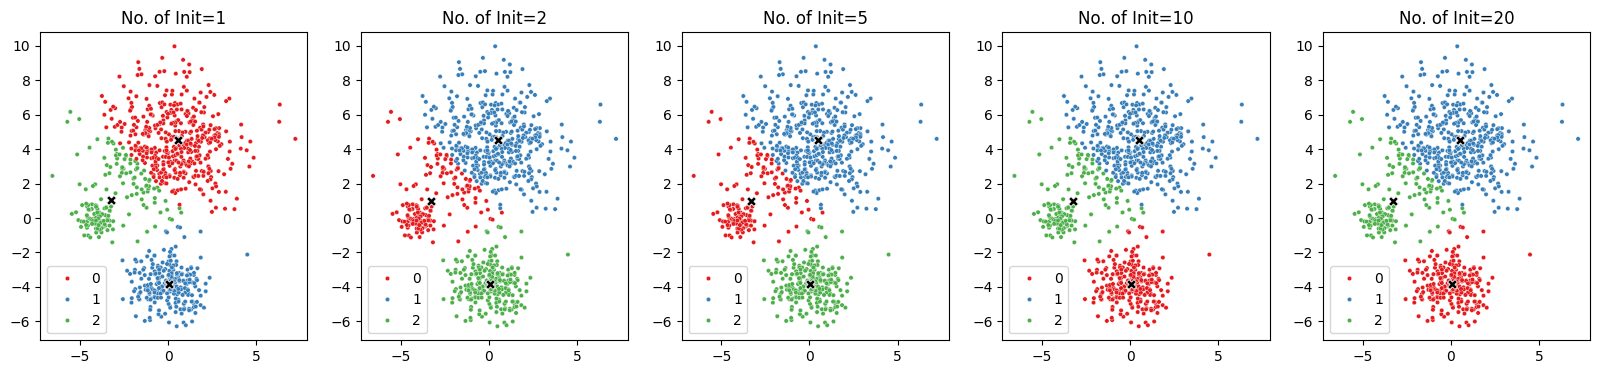

WCV=3833.368 for no. of init =1
WCV=3833.3076 for no. of init =2
WCV=3833.3076 for no. of init =5
WCV=3833.2826 for no. of init =10
WCV=3833.2826 for no. of init =20


In [14]:
# Kmeans++ initialization
# Plotting the clustering solution with different number of initializations 
n_init = np.array([1,2,5,10,20])

rs = 0

fig, ax = plt.subplots(1,n_init.shape[0],figsize=(20,4))
for n in range(n_init.shape[0]):
    kmeans_n = KMeans(n_clusters = 3, n_init = n_init[n], random_state=rs).fit(X)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_n.labels_, palette='Set1', s=10, ax=ax[n])
    sns.scatterplot(x=kmeans_n.cluster_centers_[:,0], y=kmeans_n.cluster_centers_[:,1], 
                    c='black', s=50, marker='X', ax=ax[n])
    ax[n].set_title("No. of Init="+str(n_init[n]))
plt.show()

# Print the within cluster variation
for n in range(n_init.shape[0]):
    kmeans_n = KMeans(n_clusters = 3, n_init = n_init[n], random_state=rs).fit(X)
    print("WCV="+str(round(kmeans_n.inertia_,4))+' for no. of init ='+ str(n_init[n]))


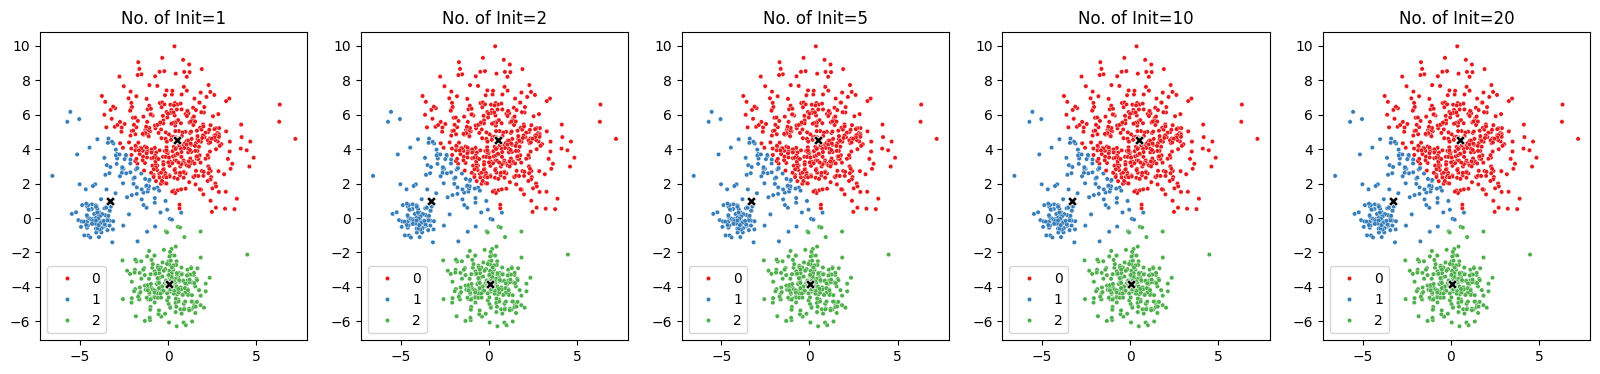

WCV=3833.3076 for no. of init =1
WCV=3833.3076 for no. of init =2
WCV=3833.3076 for no. of init =5
WCV=3833.3076 for no. of init =10
WCV=3833.3076 for no. of init =20


In [15]:
# Random initialization
# Plotting the clustering solution with different number of initializations 
n_init = np.array([1,2,5,10,20])

rs = 0

fig, ax = plt.subplots(1,n_init.shape[0],figsize=(20,4))
for n in range(n_init.shape[0]):
    kmeans_n = KMeans(n_clusters = 3, init = 'random', n_init = n_init[n], random_state=rs).fit(X)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_n.labels_, palette='Set1', s=10, ax=ax[n])
    sns.scatterplot(x=kmeans_n.cluster_centers_[:,0], y=kmeans_n.cluster_centers_[:,1], 
                    c='black', s=50, marker='X', ax=ax[n])
    ax[n].set_title("No. of Init="+str(n_init[n]))
plt.show()

# Print the within cluster variation
for n in range(n_init.shape[0]):
    kmeans_n = KMeans(n_clusters = 3, init = 'random',n_init = n_init[n], random_state=rs).fit(X)
    print("WCV="+str(round(kmeans_n.inertia_,4))+' for no. of init ='+ str(n_init[n]))

K-means++ is the preferred initialisation strategy, as it consistently produces good clustering solutions with fewer iterations and fewer initialisations. In contrast, random initialisation is highly sensitive to the initial centroid placement and requires a larger number of initialisations (typically 10–20) to achieve comparable within-cluster variation. Changing the random state has little effect on K-means++ but can significantly impact results obtained with random initialisation, especially when the number of restarts is small.

🏁 **Now, is a good point to switch driver and navigator**

### 🚩 Exercise 5 (CORE)

Since we simulated the data, we know the true number of clusters. However, in practice this number is rarely known. Find the K-means solution with different choices of $K$ and plot the within-cluster variation as a function of $K$. What value(s) of $K$ seem appropriate based on this plot?

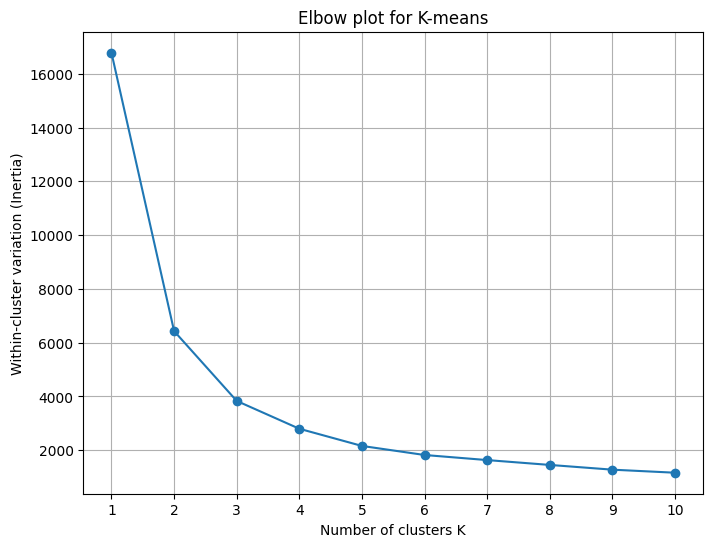

In [16]:

Ks = range(1, 11)
wcv = []

for k in Ks:
    kmeans = KMeans(
        n_clusters = k, 
        init = "k-means++", 
        n_init = 10, 
        random_state = 0
    )
    kmeans.fit(X)
    wcv.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(Ks, wcv, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Within-cluster variation (Inertia)")
plt.title("Elbow plot for K-means")
plt.xticks(Ks)
plt.grid(True)
plt.show()

The within-cluster variation decreases rapidly as K increases up to 3, after which the rate of decrease slows substantially. This “elbow” in the plot suggests that K=3 is an appropriate choice for the number of clusters.

### 🚩 Exercise 6 (CORE)

Now let's use the silhouette analysis to choose the number of clusters. In the follwing code cells, we use [`silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) to compute the silhouette coefficient for each data point, and [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) which computes the mean of the silhouette coefficients across all data points.

a) How many clusters would you choose based only on maximizing the silhouette score?

b) Considering also the violin plots, which visualize the distribution of the silhouette coefficient across data points within each cluster, would you still choose the same number of clusters or pick a different number? Why?

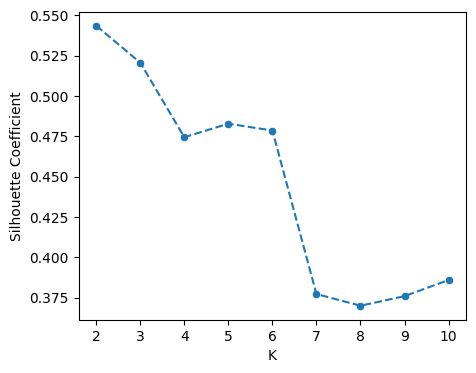

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Define the range of possible number ofclusters
K = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

# First plot the silhouette coeffcient for different choices of K
silhouette_coeffs = np.zeros(K.shape)
for i in range(K.shape[0]):
    #Define kmeans object, fit, and predict labels
    kmeans_K = KMeans(n_clusters = K[i], n_init = 20, random_state=0).fit(X)
    labs = kmeans_K.predict(X)
    # Compute silhouette coefficient
    silhouette_coeffs[i] = silhouette_score(X, labs)

# Plot the silhouette coefficients
fig, ax = plt.subplots(1,1,figsize=(5,4))
sns.lineplot(x=K, y=silhouette_coeffs, linestyle='dashed', ax=ax)
sns.scatterplot(x=K, y=silhouette_coeffs, ax=ax)
plt.xlabel('K')
plt.ylabel('Silhouette Coefficient')
plt.show()

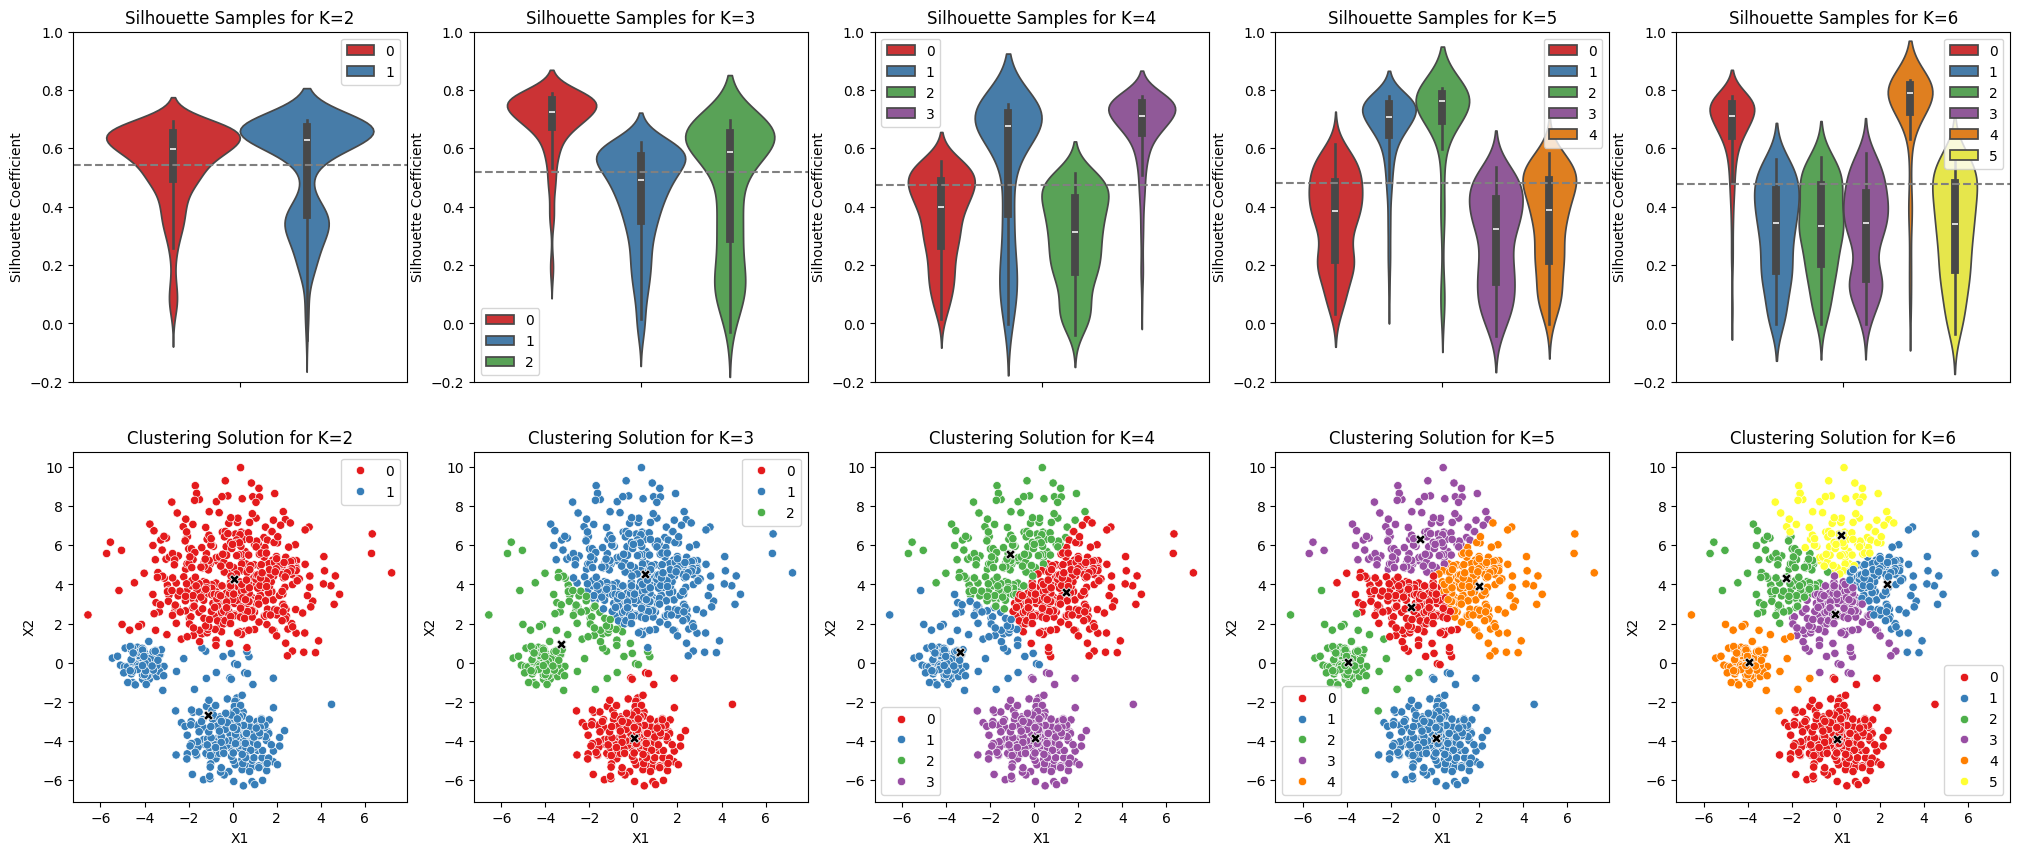

In [18]:
# Plot the silhouette samples for different choices of K

max_i = 4
fig, ax = plt.subplots(2, 5, figsize=(25, 10))  
for i in range(max_i+1):
    kmeans_K = KMeans(n_clusters = K[i], n_init = 20, random_state=0).fit(X)
    labs = kmeans_K.predict(X)
    silhouette_samps = silhouette_samples(X, labs)

    # Create a violin plot of the silhouette samples
    sns.violinplot(y=silhouette_samps, hue=labs, ax=ax[0,i], palette='Set1')
    ax[0,i].axhline(silhouette_samps.mean(), ls='--',c="gray")
    ax[0,i].set_title(f'Silhouette Samples for K={K[i]}')
    ax[0,i].set_ylabel('Silhouette Coefficient')
    ax[0,i].set_xlabel('')
    ax[0,i].set_ylim([-0.2, 1])

    # Plot the clustering solution
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labs, ax=ax[1,i], palette='Set1')
    sns.scatterplot(x=kmeans_K.cluster_centers_[:,0], y=kmeans_K.cluster_centers_[:,1], 
                    c='black', s=50, marker='X', ax=ax[1,i])
    ax[1,i].set_title(f'Clustering Solution for K={K[i]}')
    ax[1,i].set_ylabel('X2')
    ax[1,i].set_xlabel('X1')

a) Based solely on maximising the mean silhouette score, K=2 would be chosen.

b) Based on the distribution of the silhouette coefficient across data points within each cluster visualised by the violin plots, I would choose K=3. The violin plots show that K=3 yields consistently high silhouette values across most data points, indicating compact and well-separated clusters.

### 🚩 Exercise 7 (CORE)

Now standardize the data and re-run the K-means algorithm. Qualitatively, how has standardising the data impacted performance? Can you argue why you observe what you see?

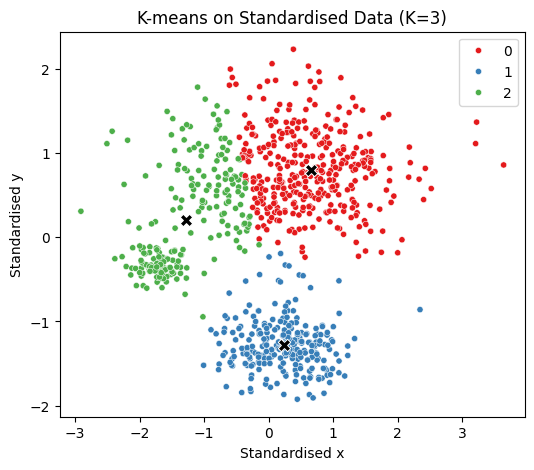

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans_std = KMeans(
    n_clusters = 3, 
    n_init = 20, 
    random_state = 0
)
kmeans_std.fit(X_std)

labels_std = kmeans_std.labels_

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_std[:,0], y=X_std[:,1], hue=labels_std, palette="Set1", s=20)
sns.scatterplot(
    x = kmeans_std.cluster_centers_[:,0], 
    y = kmeans_std.cluster_centers_[:,1], 
    c = "black", 
    s = 80, 
    marker = "X"
)
plt.xlabel("Standardised x")
plt.ylabel("Standardised y")
plt.title("K-means on Standardised Data (K=3)")
plt.show()

Standardising the data has only a minor impact on clustering performance because the original features already have comparable scales. In general, standardisation is important for K-means when features have very different variances, as Euclidean distance would otherwise be dominated by high-variance features.

# Hierarchical Clustering: Simulated Example <a id='hc'></a>

To perform hierarchical clustering, we will use the [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from `scipy.cluster.hierarchy`. The inputs to specify include

-  the data. 
- `metric`: specifies the dissimarlity between data points. Defaults to the Euclidean distance.
- `method`: specifies the type of linkage, e.g. complete, single, or average.

Then, we can use [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) from `scipy.cluster.hierarchy` to plot the dendrogram.

Note that you can also use [`AgglomerativeClustering`](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.AgglomerativeClustering.html) from `sklearn.cluster`, which similarly has options for `metric` to specify the distance and `linkage` to specify the type of linkage. However, `sklearn` does not have its own functions for plotting the dendogram and use must use the tools from `scipy.cluster.hierarchy`.  

### 🚩 Exercise 8 (CORE)

a) For the following code cell, what is dissimarlity and linkage is used in hierarchical clustering?

In [20]:
hc_comp = hierarchy.linkage(X, method='complete')

Dissimilarity: Euclidean distance (default in scipy.linkage)

Linkage: Complete linkage

b)  Plot the dendogram by running the code below. Try changing the 'color_threshold' to a number (e.g. 11) to color the branches of the tree below the threshold with different colors. How many clusters are identified if the tree is cut at that threshold?

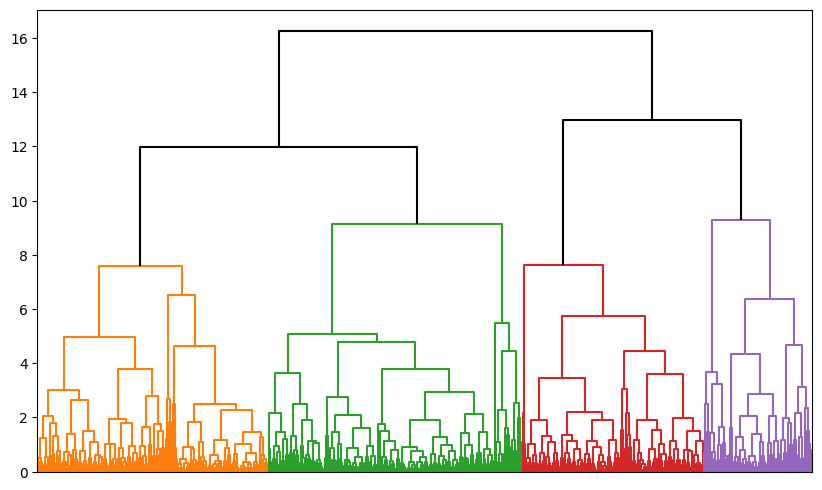

In [26]:
# Plot the dendrogram
fig, ax = plt.subplots(1, 1, figsize=(10,6))
hierarchy.dendrogram(hc_comp, ax=ax, no_labels=True,
                     color_threshold=11, above_threshold_color='black')
plt.show()

Cutting the dendrogram at a height of approximately 11 identifies 4 clusters,

c) Now, use the function `cut_tree()` from `scipy.cluster.hierarchy` to determine the cluster labels associated with a given cut of the dendrogram. You can either specify the number of clusters via `n_clusters` or the height/threshold at which to cut via `height`. Plot the data colored by the cluster labels.

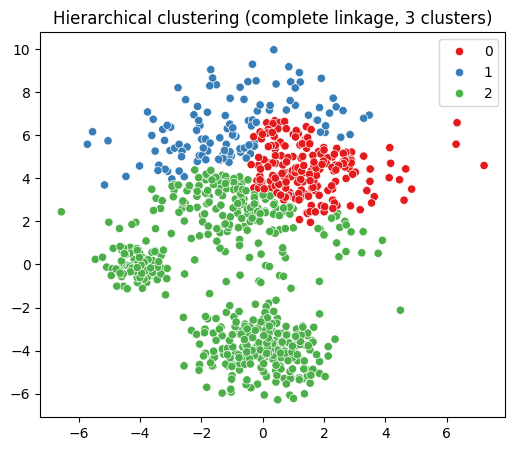

In [ ]:
# Code for your aswer here: Cut the tree at a specified number of clusters
from scipy.cluster.hierarchy import cut_tree

labels_hc = cut_tree(hc_comp, n_clusters=3).flatten()

plt.figure(figsize=(6,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_hc, palette="Set1")
plt.title("Hierarchical clustering (complete linkage, 3 clusters)")
plt.show()


### 🚩 Exercise 9 (CORE)

Now try changing the linkage to single and average. Does this affect on the results?

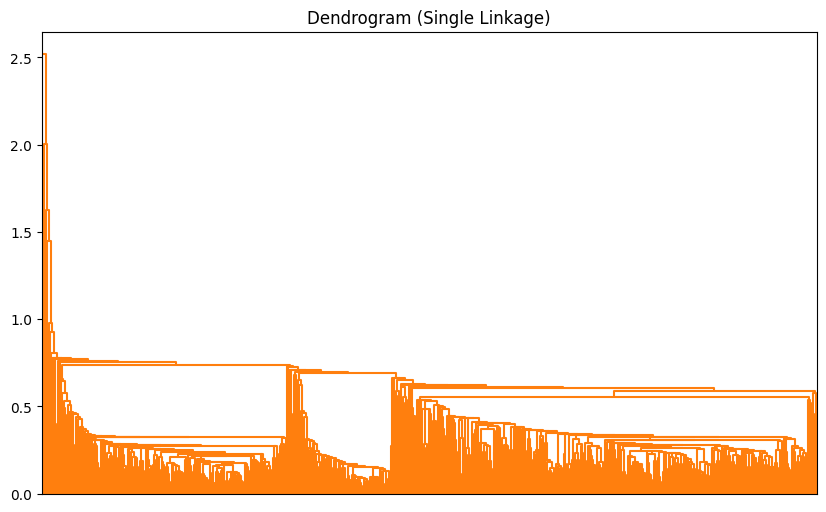

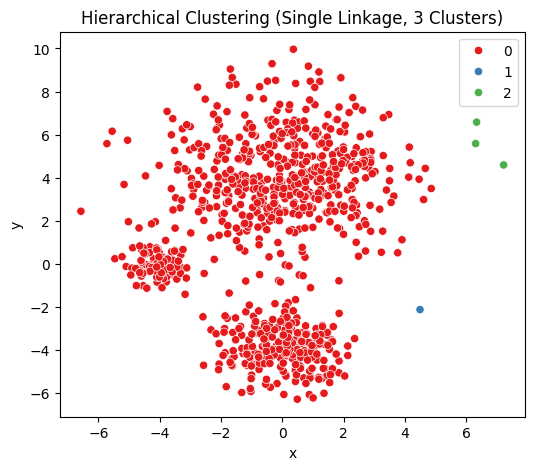

In [ ]:
# Code for answer here
# First: change to single linkage, plot the dendrogram, and visualize the clustering solution by cutting the tree
hc_single = hierarchy.linkage(X, method = 'single')

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
hierarchy.dendrogram(
    hc_single, 
    ax = ax, 
    no_labels = True, 
    color_threshold = 11, 
    above_threshold_color = 'black'
)
ax.set_title("Dendrogram (Single Linkage)")
plt.show()

labels_single = cut_tree(hc_single, n_clusters=3).flatten()

plt.figure(figsize = (6, 5))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = labels_single, palette = "Set1")
plt.title("Hierarchical Clustering (Single Linkage, 3 Clusters)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

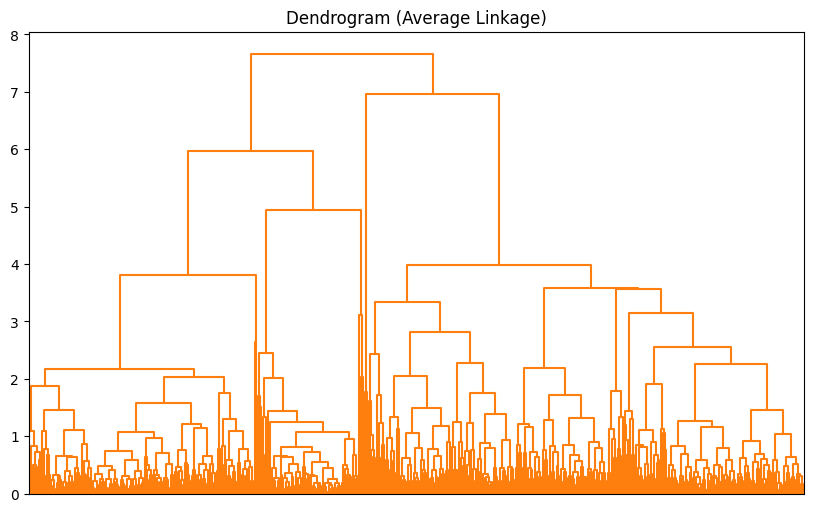

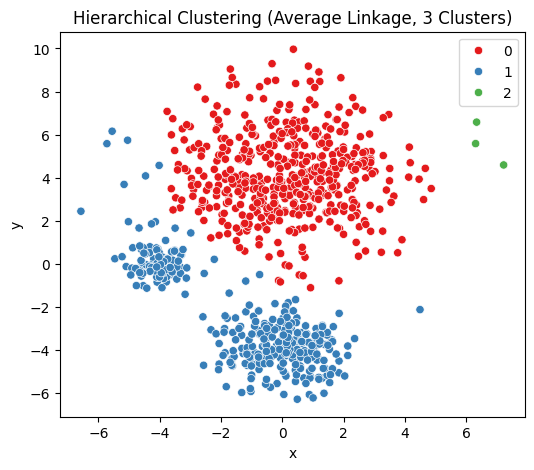

In [33]:
# Code for answer here
# Next: change to average linkage, plot the dendrogram, and visualize the clustering solution by cutting the tree
hc_avg = hierarchy.linkage(X, method = 'average')

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
hierarchy.dendrogram(
    hc_avg, 
    ax = ax, 
    no_labels = True, 
    color_threshold = 11, 
    above_threshold_color = 'black'
)
ax.set_title("Dendrogram (Average Linkage)")
plt.show()

labels_avg = cut_tree(hc_avg, n_clusters=3).flatten()

plt.figure(figsize = (6, 5))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = labels_avg, palette = "Set1")
plt.title("Hierarchical Clustering (Average Linkage, 3 Clusters)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Single linkage performs poorly for this dataset due to chaining, merging clusters via nearest neighbours rather than global structure.

Average linkage produces reasonable clustering results and is less sensitive to outliers than complete linkage, while avoiding the chaining effect seen in single linkage.

🏁 **Now, is a good point to switch driver and navigator**

# Gene Expression Data <a id='genedata'></a>

Now, we will consider a more complex real dataset with a larger feature space. 

The dataset is the **NCI cancer microarray dataset** discussed in both *Introduction to Statistical Learning* and  *Elements of Statistical Learning*. The dataset consists of $D=6830$ gene expression measurements for each of $N=64$ cancer cell lines. The aim is to determine whether there are groups among the cell lines with similar gene expression patterns. This is an example of a high-dimensional dataset with $D$ much larger than $N$, which makes visualization difficult. The $N=64$ cancer cell lines have been obtained from samples of cancerous tisses, corresponding to 14 different types of cancer. However, our focus remains unsupervised learning and we will use the cancer labels only to plot. 

We first need to read in the dataset.

In [35]:
#Fetch the data and cancer labels
url_data = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv'
url_labels = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.label.txt'

X = pd.read_csv(url_data)
y = pd.read_csv(url_labels, header=None)

# clean data by dropping identifier column and transpose so that features are columns
X = X.drop(labels='Unnamed: 0', axis=1).T

In [36]:
X.shape

(64, 6830)

In [37]:
y.shape

(64, 1)

Let's visualise the data with a heatmap.

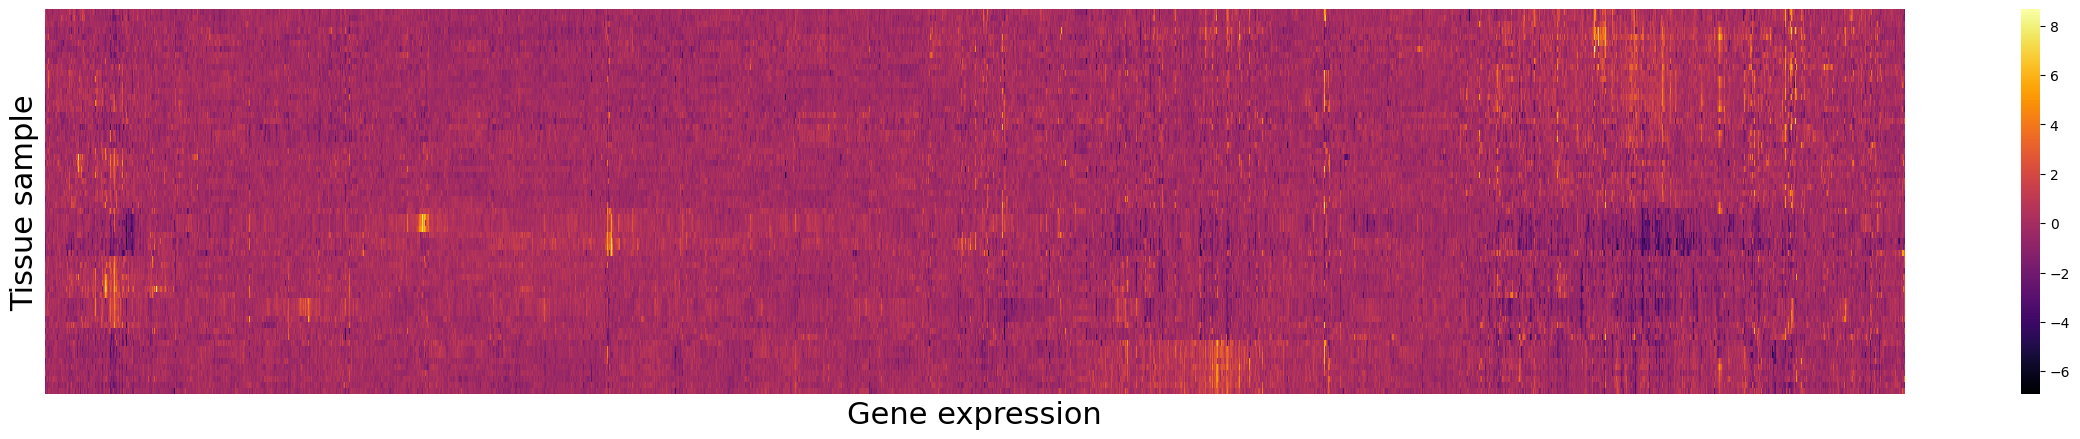

In [38]:
# Heatmap of the gene expression data
fig, ax = plt.subplots(1,1,figsize=(30,5))
sns.heatmap(X, cmap='inferno', ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Gene expression", fontsize=22)
ax.set_ylabel("Tissue sample", fontsize=22)
plt.show()

We now convert our pandas dataframe into a numpy array and create integer labels for cancer type (for plotting purposes)

If you print the unique labels, you will notice there are lots of inconsistencies with white space etc. Run the following code to clean the labels.

In [39]:
# Print the unique labels and counts
y.value_counts()

0                         
OVARIAN                       4
RENAL                         4
MELANOMA                      3
COLON                         3
NSCLC                         3
BREAST                        2
CNS                           2
BREAST                        2
NSCLC                         2
NSCLC                         2
RENAL                         2
PROSTATE                      2
CNS                           2
MELANOMA                      2
LEUKEMIA                      2
COLON                         2
MELANOMA                      2
BREAST                        1
BREAST                        1
BREAST                        1
CNS                           1
LEUKEMIA                      1
COLON                         1
COLON                         1
MCF7D-repro                   1
LEUKEMIA                      1
LEUKEMIA                      1
MCF7A-repro                   1
LEUKEMIA                      1
K562A-repro                   1
K562B-repro  

In [40]:
# Clean the labels by stripping the white space
y_clean = np.asarray(y).flatten()
for j in range(y_clean.size):
    y_clean[j] = y_clean[j].strip()

cancer_types = list(np.unique(y_clean))
cancer_groups = np.array([cancer_types.index(lab) for lab in y_clean])

In [41]:
pd.Series(y_clean).value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: count, dtype: int64

In [43]:
X_array = np.asarray(X)

### 🚩 Exercise 10 (EXTRA)

Perform a PCA of $\mathbf X$ to visualize the data. Plot the first few principal component scores and color by cancer type. Do cell lines within the same cancer types seems to have similar scores? Make a scree plot of the proportion of variance explained. How many components does this suggest?

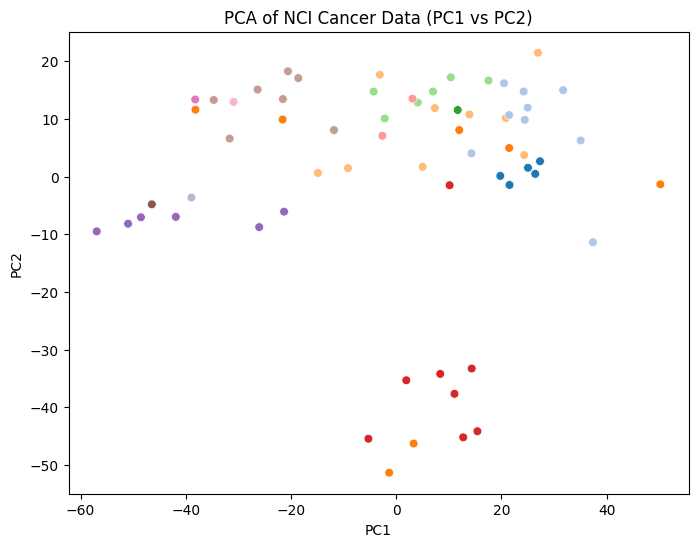

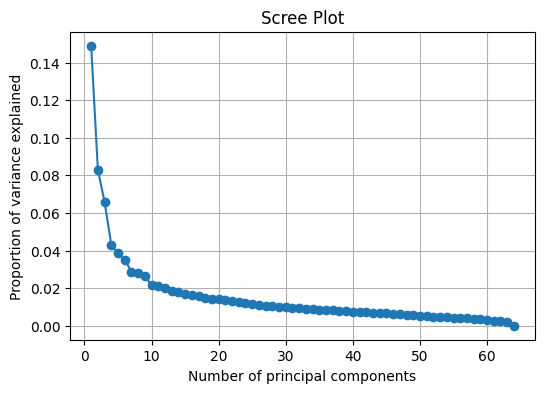

In [50]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_array)

plt.figure(figsize = (8,6))
sns.scatterplot(
    x = X_pca[:,0], 
    y = X_pca[:,1], 
    hue = y_clean, 
    palette = "tab20", 
    s = 40, 
    legend = False
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of NCI Cancer Data (PC1 vs PC2)")
plt.show()

plt.figure(figsize = (6,4))
plt.plot(
    np.arange(1, len(pca.explained_variance_ratio_)+1), 
    pca.explained_variance_ratio_, 
    marker='o'
)
plt.xlabel("Number of principal components")
plt.ylabel("Proportion of variance explained")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

When plotting the first two principal component scores, cell lines belonging to the same cancer type tend to cluster together, although some overlap between cancer types remains. This indicates that gene expression contains biologically meaningful structure related to cancer type, but the separation is not perfect.

The scree plot shows a sharp drop in variance after the fourth principal component, indicating that the first four PCs adequately summarize the data.

# Hierarchical Clustering: Gene Expression Data <a id='hc_genedata'></a>

Now, let's perform hierarchical clustering on the gene expression data. 

### 🚩 Exercise 11 (CORE)

a) Plot the dendrogram with complete, single, and average linkage. Does the choice of linkage affect the results? Which linkage would you choose?

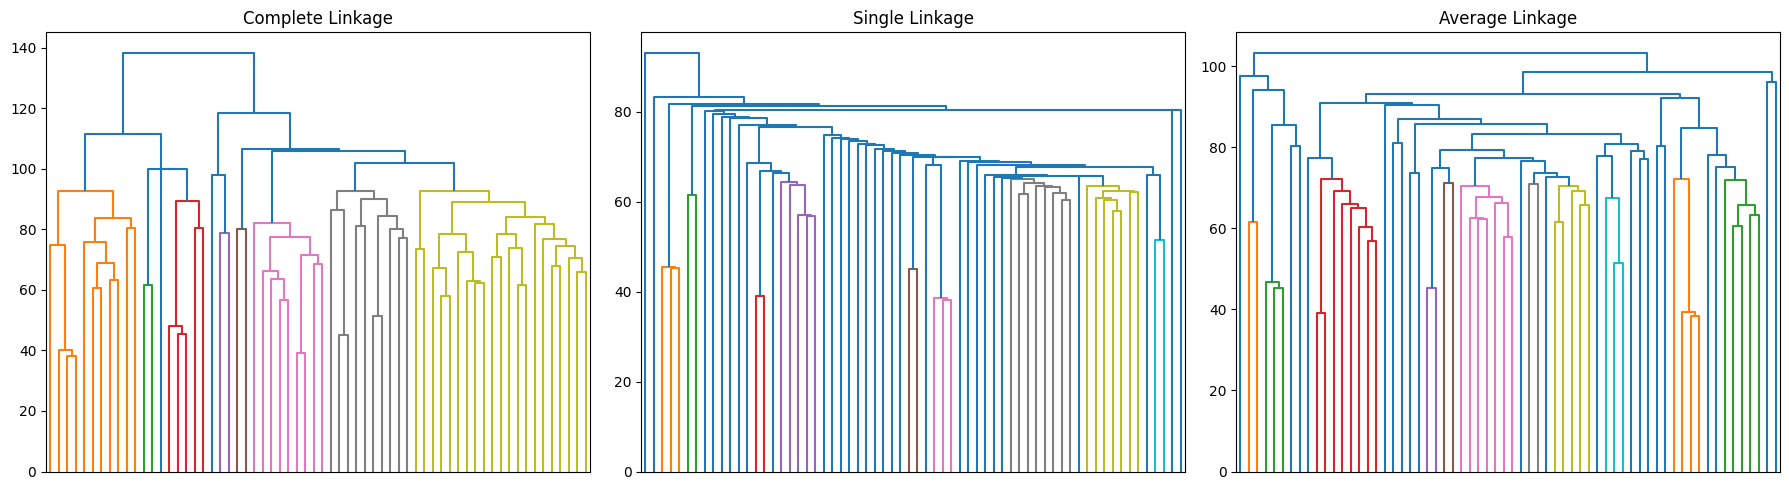

In [ ]:
# Code for your answer here!
# Fit hierarchical clustering with different types of linkage
hc_complete = hierarchy.linkage(X_array, method = 'complete')
hc_single = hierarchy.linkage(X_array, method = 'single')
hc_average = hierarchy.linkage(X_array, method = 'average')

# Plot the dendogram
fig, axes = plt.subplots(1, 3, figsize = (18,5))

hierarchy.dendrogram(hc_complete, ax = axes[0], no_labels = True)
axes[0].set_title("Complete Linkage")

hierarchy.dendrogram(hc_single, ax = axes[1], no_labels = True)
axes[1].set_title("Single Linkage")

hierarchy.dendrogram(hc_average, ax = axes[2], no_labels = True)
axes[2].set_title("Average Linkage")

plt.tight_layout()
plt.show()

The choice of linkage strongly affects the hierarchical clustering results. Single linkage suffers from the chaining effect, producing elongated clusters and poor separation. Complete linkage yields compact and well-separated clusters, while average linkage provides a compromise between the two.

Overall, complete linkage is preferred for this dataset as it avoids chaining and produces clearer, more interpretable clusters

b) Select a linkage and a number of clusters (by examining the dendrogram and jumps in the heights of the clusters merged). Plot the dendogram and color the branches to identify the clusters. Use the option `labels = np.asarray(y_clean), leaf_font_size=10` in `hierarchy.dendrogram` to add the cancer types as labels for each data point. Do you observe any patterns between the clusters and cancer types? You may also want to use `pd.crosstab` to compute a cross-tabulation to compare the clusters and cancer types.

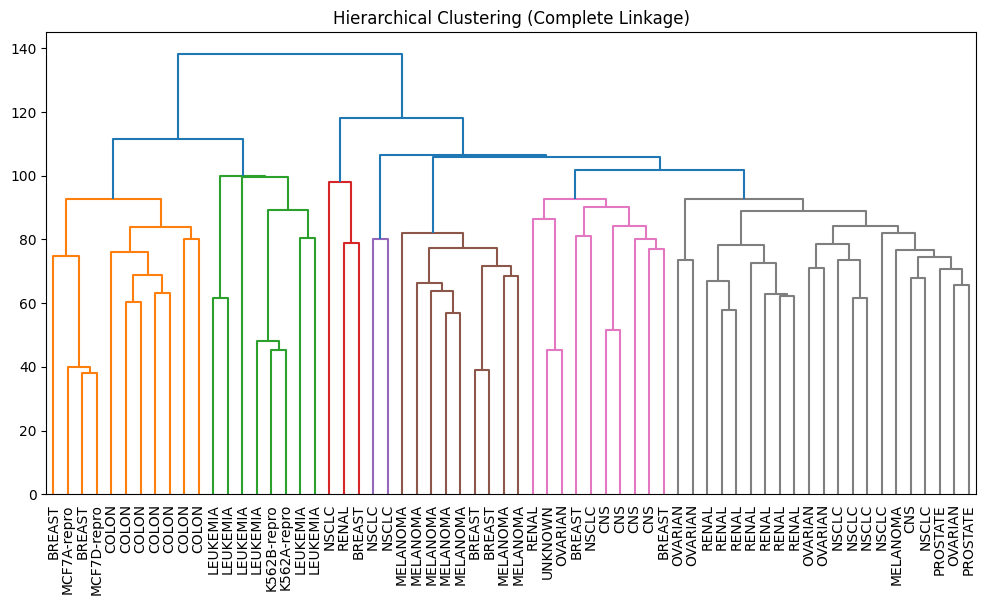

col_0,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,,
0,2,4,0,0,0,0,0,0,0,1,1,0,1,1
1,0,1,0,0,0,0,0,0,1,5,5,2,7,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,1,6,0,0,0,0,0,0,0,0
4,2,0,7,0,0,0,1,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,2,0,0,0,0
6,2,0,0,0,0,0,0,0,7,0,0,0,0,0


In [59]:
fig, ax = plt.subplots(figsize = (12,6))
hierarchy.dendrogram(
    hc_complete, 
    labels = np.asarray(y_clean), 
    leaf_font_size = 10, 
    color_threshold = 100
)
ax.set_title("Hierarchical Clustering (Complete Linkage)")
plt.show()

labels_hc = cut_tree(hc_complete, n_clusters = 7).flatten()

# Cross-tabulation
ct = pd.crosstab(labels_hc, y_clean)
ct

Using complete linkage and cutting the dendrogram at a height that yields a moderate number of clusters (e.g. around 100), several clusters are strongly enriched for specific cancer types. This indicates a clear relationship between the hierarchical clustering structure and known cancer labels. However, some clusters contain multiple cancer types, reflecting biological heterogeneity and overlap in gene expression profiles.

🏁 **Now, is a good point to switch driver and navigator**

# K-means Clustering: Gene Expression Data <a id='kmeans_genedata'></a>

Now, let's perform k-means clustering on the gene expression data.

### 🚩 Exercise 12 (CORE)

Perform K-means clustering with the same number of clusters that you selected for hierarchical clustering. Are the results similar?

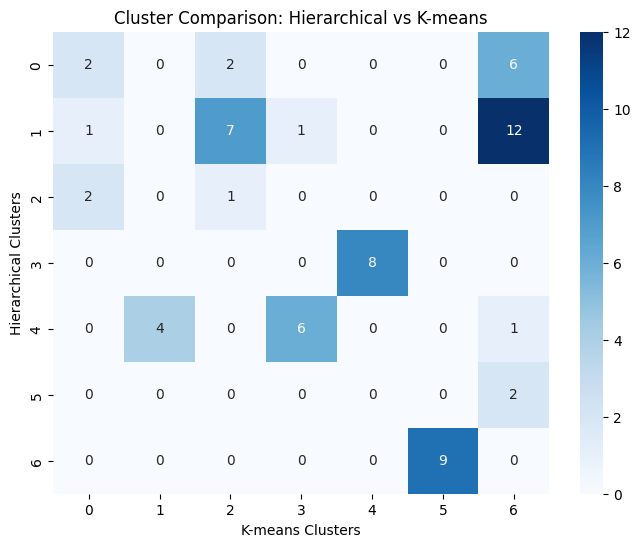

In [60]:
kmeans = KMeans(n_clusters = 7, n_init = 20, random_state = 0)
labels_km = kmeans.fit_predict(X_array)

ct = pd.crosstab(labels_hc, labels_km)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.xlabel('K-means Clusters')
plt.ylabel('Hierarchical Clusters')
plt.title('Cluster Comparison: Hierarchical vs K-means')
plt.show()

The heatmap shows that most major clusters in hierarchical clustering correspond closely to the K-means clusters, indicating partial agreement. However, some clusters are split across multiple K-means clusters, reflecting differences in the clustering methods.

This is typical when comparing distance-based linkage (hierarchical) vs centroid-based clustering (K-means).

Overall, the clustering results are similar but not identical.

### 🚩 Exercise 13 (EXTRA)

Plot the two clustering solutions along with a plot of the data colored by the cancer types in the space spanned by the first two principal components.

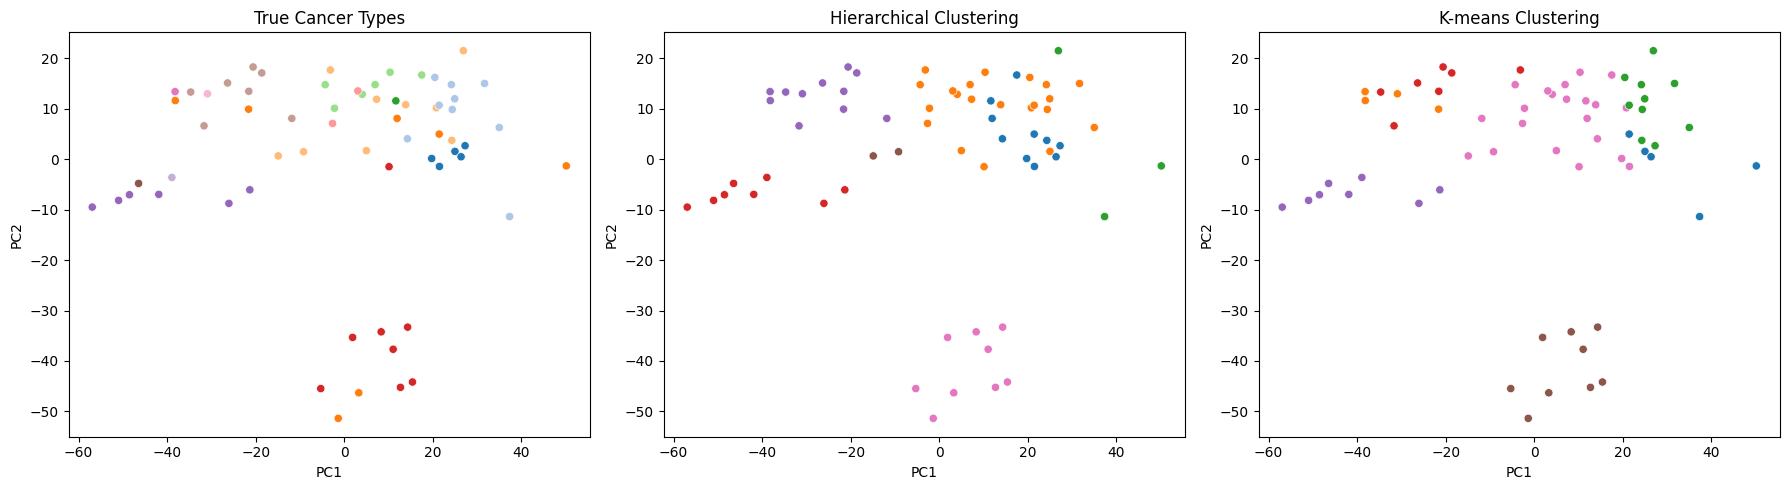

In [61]:
df_plot = pd.DataFrame({
    "PC1": X_pca[:,0], 
    "PC2": X_pca[:,1], 
    "Cancer Type": y_clean, 
    "Hierarchical Cluster": labels_hc, 
    "KMeans Cluster": labels_km
})

fig, axes = plt.subplots(1, 3, figsize = (18,5))

sns.scatterplot(
    data = df_plot, x = "PC1", y = "PC2", hue = "Cancer Type", 
    palette = "tab20", ax = axes[0], legend = False
)
axes[0].set_title("True Cancer Types")

sns.scatterplot(
    data = df_plot, x = "PC1", y = "PC2", hue = "Hierarchical Cluster", 
    palette = "tab10", ax = axes[1], legend = False
)
axes[1].set_title("Hierarchical Clustering")

sns.scatterplot(
    data = df_plot, x = "PC1", y = "PC2", hue = "KMeans Cluster", 
    palette = "tab10", ax = axes[2], legend = False
)
axes[2].set_title("K-means Clustering")

plt.tight_layout()
plt.show()

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please **change 'Student 1' and 'Student 2' at the top of the notebook to include your name(s)**.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [ ]:
# !jupyter nbconvert --to pdf mlp_week03.ipynb 